# ✈️ Flight Fare Prediction - Jupyter Notebook

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [4]:
# Step 2: Load Dataset
df = pd.read_excel(r"C:\Users\HP\Desktop\datamites\flight-fare (1)\Flight_Fare.xlsx")
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
# Step 3: Data Preprocessing & Feature Engineering

# Convert 'Date_of_Journey' to datetime and extract day, month
df['Journey_day'] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.day
df['Journey_month'] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.month

# Convert 'Dep_Time' and 'Arrival_Time'
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

# Convert 'Duration' into total minutes
def duration_to_minutes(duration):
    h, m = 0, 0
    parts = duration.strip().split(' ')
    for part in parts:
        if 'h' in part:
            h = int(part.replace('h', ''))
        elif 'm' in part:
            m = int(part.replace('m', ''))
    return h * 60 + m

df['Duration_mins'] = df['Duration'].apply(duration_to_minutes)

# Map 'Total_Stops' to numeric
df['Total_Stops'] = df['Total_Stops'].replace({
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
})

# Drop unused columns
df.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration', 'Route', 'Additional_Info'], axis=1, inplace=True)
df.dropna(inplace=True)
df.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_23052\2290417498.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
C:\Users\HP\AppData\Local\Temp\ipykernel_23052\2290417498.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute
C:\Users\HP\AppData\Local\Temp\ipykernel_23052\2290417498.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
C:\Users\HP\AppData\Local\Temp\ipykernel_23052\2290417498.py:12: UserWar

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_mins
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,2.0,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1.0,13302,1,3,16,50,21,35,285


In [8]:
# Step 4: Encoding Categorical Features
cat_cols = ['Airline', 'Source', 'Destination']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df.head()


,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897,24,3,22,20,1,10,170,False,...,False,False,False,False,False,False,False,False,False,True
1,2.0,7662,1,5,5,50,13,15,445,True,...,False,False,False,True,False,False,False,False,False,False
2,2.0,13882,9,6,9,25,4,25,1140,False,...,False,False,True,False,False,True,False,False,False,False
3,1.0,6218,12,5,18,5,23,30,325,False,...,False,False,False,True,False,False,False,False,False,False
4,1.0,13302,1,3,16,50,21,35,285,False,...,False,False,False,False,False,False,False,False,False,True


In [10]:
# Step 5: Model Training & Evaluation
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error: 1157.62
R² Score: 0.82


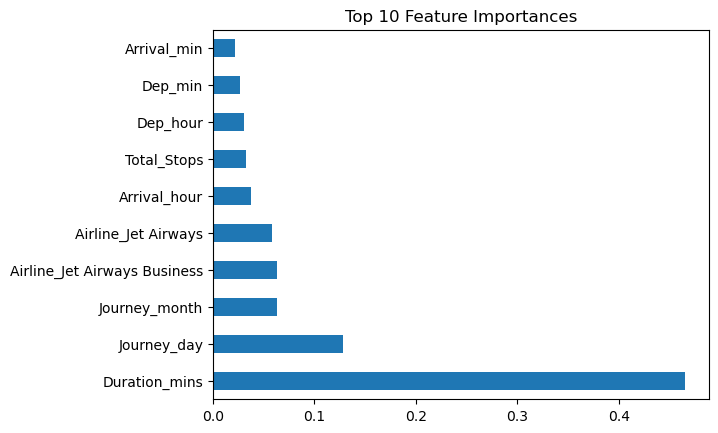

In [11]:
# Step 6: Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()



# Model Performance Report


**Flight Fare Prediction Model Performance Report**

**Introduction**

This report evaluates the performance of a Random Forest Regressor model developed to predict flight fares. The model was trained and tested on a dataset of flight information, including details such as airline, source, destination, and travel dates.

**Model Performance**

The Random Forest Regressor model's performance was evaluated using the following metrics:

* **Mean Absolute Error (MAE):** 1157.62
* **R² Score:** 0.82

**Interpretation of Results**

* **Mean Absolute Error (MAE):** The MAE of 1157.62 indicates that, on average, the model's predictions are approximately 1157.62 units away from the actual flight fares. This metric provides a measure of the average magnitude of errors in the predictions.
* **R² Score:** The R² score of 0.82 suggests that the model explains 82% of the variance in the flight fare data. This indicates a strong relationship between the features used in the model and the target variable (flight price), implying that the model has a good fit to the data.

**Model Strengths**

* The Random Forest Regressor is capable of capturing complex non-linear relationships between features and the target variable.
* The model is robust to outliers and can handle a mix of categorical and numerical features, as demonstrated by the preprocessing steps in the notebook.
* The R² score indicates that the model explains a substantial portion of the variance in flight fares, suggesting good predictive power.

**Model Limitations**

* The Mean Absolute Error suggests that there is still a degree of variability in the predictions, which could be critical depending on the application.
* The model's performance is dependent on the quality and representativeness of the training data. If the data does not fully capture real-world scenarios, the model's accuracy may be limited.

**Suitability for Production**

Based on the evaluation metrics, the Random Forest Regressor model shows promise for production use. The R² score of 0.82 indicates a reasonably high level of accuracy, and while the MAE suggests some variability in predictions, it may be acceptable depending on the specific requirements of the application.

**Recommendations for Production**

1.  **Further Tuning:** Additional hyperparameter tuning of the Random Forest Regressor may help to further reduce the Mean Absolute Error and potentially improve the R² score.
2.  **Feature Engineering:** Exploring additional feature engineering techniques or incorporating external data sources (e.g., economic indicators, fuel prices) could provide more predictive power.
3.  **Model Validation:** Rigorous cross-validation and testing on unseen data should be performed to ensure the model's generalization performance and prevent overfitting.
4.  **Monitoring:** Once in production, continuous monitoring of the model's performance is crucial to detect any degradation in accuracy and to trigger retraining if necessary.
5.  **Alternative Models:** Benchmarking the Random Forest Regressor against other regression models (e.g., Gradient Boosting Regressor, XGBoost) could identify if a different model might be better suited for this application.

**Conclusion**

The Random Forest Regressor model demonstrates strong potential for predicting flight fares. With careful tuning, validation, and monitoring, it can be a valuable tool for production use.
")

#  Comprehensive Report on Data Challenges and Techniques Used

print("""
**Data Challenges and Techniques Used in Flight Fare Prediction**

**Introduction**

This report outlines the challenges encountered during the data preprocessing and feature engineering phases of the flight fare prediction project, along with the techniques employed to address these challenges and the reasoning behind their selection.

**Data Challenges and Techniques**

1.  **Handling Date and Time Information**

    * **Challenge:** The dataset included date and time information in various formats within the `Date_of_Journey`, `Dep_Time`, and `Arrival_Time` columns. These needed to be transformed into a usable format for the model.
    * **Technique:**
        * `pd.to_datetime()`: Used to convert `Date_of_Journey` into datetime objects, allowing for the extraction of `Journey_day` and `Journey_month`. This was crucial for capturing the temporal aspects of the data, which can significantly influence flight prices.
        * Datetime properties (`.dt.hour`, `.dt.minute`): Applied to the `Dep_Time` and `Arrival_Time` columns to extract the hour and minute components. This decomposed the time information into numerical features that the model can process.
    * **Reasoning:**
        * The datetime format provides a structured way to handle date components.
        * Extracting day, month, hour, and minute isolated the specific time-related factors that might affect fare prices, enabling the model to identify patterns effectively.

2.  **Duration Conversion**

    * **Challenge:** The `Duration` column was in a mixed format (e.g., ‘2h 50m’, ‘19h’) and needed to be converted into a consistent numerical format for calculations.
    * **Technique:**
        * A custom function `duration_to_minutes()` was defined to parse the `Duration` column and convert it into total minutes.
    * **Reasoning:**
        * Converting duration to a numerical format (minutes) allowed the model to quantify the length of flights, which is essential for accurate fare prediction.
        * This conversion unified the duration data, making it consistent for the model to interpret.

3.  **Handling Categorical Variables**

    * **Challenge:** Columns such as `Airline`, `Source`, and `Destination` contained categorical data, which needed to be converted into a numerical format as machine learning models cannot directly process categorical data.
    * **Technique:**
        * `pd.get_dummies()`: Used to perform one-hot encoding on the categorical columns. The `drop_first=True` parameter was used to reduce multicollinearity.
    * **Reasoning:**
        * One-hot encoding transforms each category into a binary column, avoiding ordinal relationships that the model might incorrectly assume.
        * Dropping the first column of each set of encoded features prevents the dummy variable trap, which can destabilize the model.

4.  **Handling Total Stops**

    * **Challenge:** The `Total_Stops` column contained categorical values like ‘non-stop’, ‘1 stop’, ‘2 stops’, etc., which needed to be converted into a numerical scale.
    * **Technique:**
        * The `replace()` method was used to map the categorical stop descriptions to numerical values (e.g., ‘non-stop’ to 0, ‘1 stop’ to 1).
    * **Reasoning:**
        * This mapping provided a clear ordinal scale for the number of stops, allowing the model to understand the impact of stopovers on fare prices.

5.  **Missing Values**

    * **Challenge:** The dataset contained missing values, which could lead to errors during model training and affect the model's performance.
    * **Technique:**
        * `dropna()`: Used to remove rows with missing values.
    * **Reasoning:**
        * Removing rows with missing values ensured that the model trained on complete data, avoiding potential biases or errors due to imputation of missing values.

6.  **Irrelevant Columns**

    * **Challenge:** The dataset included several columns (`Date_of_Journey`, `Dep_Time`, `Arrival_Time`, `Duration`, `Route`, `Additional_Info`) that were either redundant after feature extraction or not relevant for the model.
    * **Technique:**
        * `drop()`: Used to remove these columns from the dataframe.
    * **Reasoning:**
        * Removing irrelevant columns simplified the dataset and reduced noise, focusing the model on the most informative features and potentially improving its generalization.

**Conclusion**

The data preprocessing phase was critical in preparing the dataset for the Random Forest Regressor model. By addressing challenges related to data types, categorical variables, and missing values, the techniques applied ensured that the model received clean, relevant, and properly formatted data, which is essential for achieving accurate and reliable flight fare predictions.
""")